#                EXPLAINABLE - AI
**ASSIGNMENT - 2**

2303A52157

BATCH-34

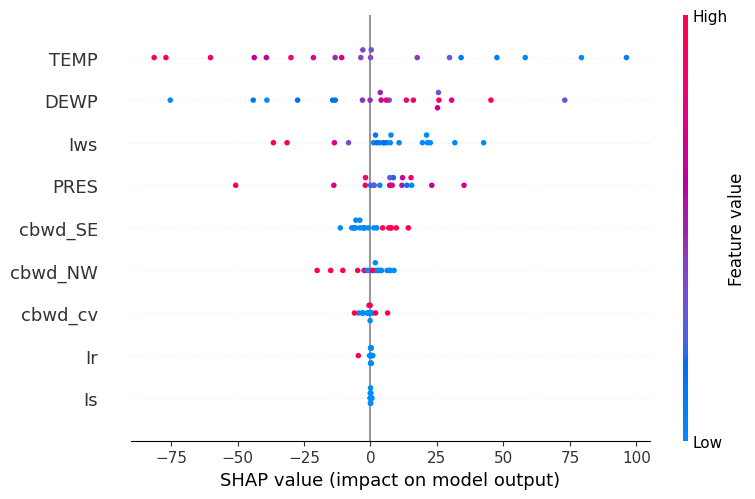

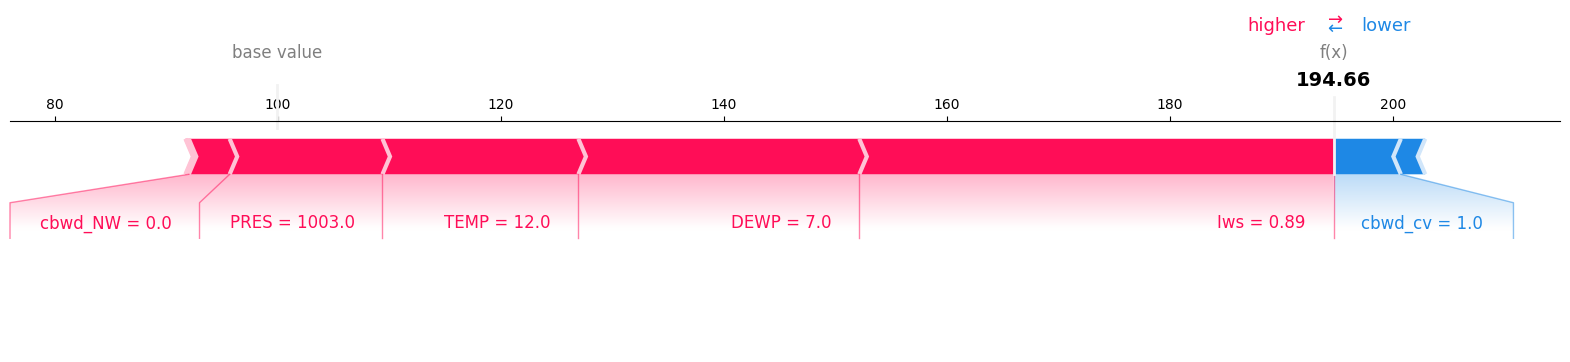

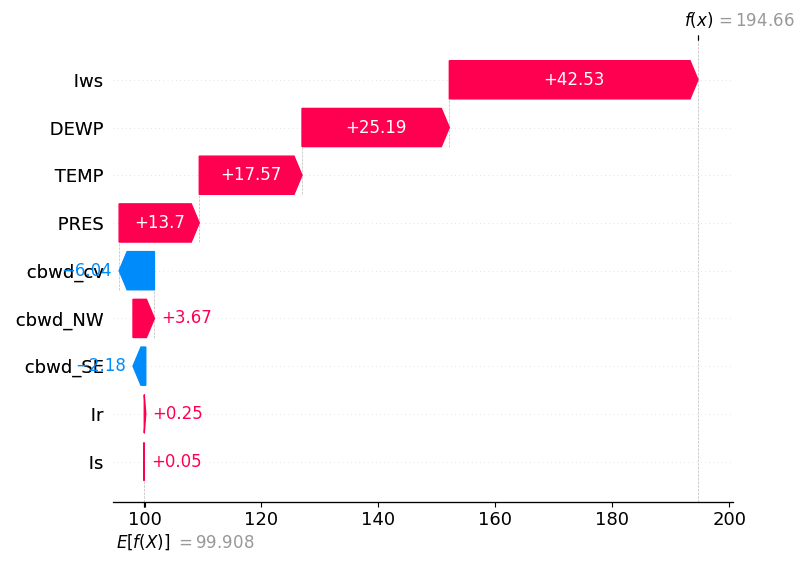

Top 5 influential features:
    Feature  SHAP Importance  Model Importance
1     TEMP        37.310539          0.246091
0     DEWP        24.598912          0.270003
3      Iws        14.962887          0.205479
2     PRES        11.992203          0.189751
7  cbwd_SE         5.634275          0.030976
RMSE: 73.0703764941717 MSE: 5339.279920999999 MAE: 51.68195 R²: 0.36135455100362135


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import shap

url = "/content/PRSA_data_2010.1.1-2014.12.31.csv"
df = pd.read_csv(url)
df = df.drop(['No', 'year', 'month', 'day', 'hour'], axis=1)
df = df.dropna()
df = pd.get_dummies(df, columns=['cbwd'], drop_first=True)
df = df.sample(2000, random_state=42)

X = df.drop('pm2.5', axis=1)
y = df['pm2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred) ** 0.5
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test[:20])

shap.summary_plot(shap_values, X_test[:20])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0], matplotlib=True)
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], shap_values[0], X_test.iloc[0])

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Importance': np.abs(shap_values).mean(axis=0),
    'Model Importance': model.feature_importances_
}).sort_values(by='SHAP Importance', ascending=False)

print("Top 5 influential features:\n", feature_importance.head())
print("RMSE:", rmse, "MSE:", mse, "MAE:", mae, "R²:", r2)
